In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
csv_file_path = r'..\Data\Education_spending\share-of-education-in-government-expenditure.csv'
df_edu_original = pd.read_csv(csv_file_path)
df_edu = df_edu_original.copy()
df_edu = df_edu[df_edu['Year'] >= 1980]
df_edu = df_edu.drop(columns=['Code'] , errors='ignore')
df_edu.rename(columns={'Entity': 'country', 'Year' : 'year', 'Government expenditure on education, total (% of government expenditure)' : 'government_education_spending_%'}, inplace=True)
df_edu.columns

Index(['country', 'year', 'government_education_spending_%'], dtype='object')

In [12]:
csv_file_path = r'..\Data\GDP_growth\real-gdp-growth.csv'
df_gdp_rate_original = pd.read_csv(csv_file_path)
df_gdp_rate = df_gdp_rate_original.copy()
df_gdp_rate.rename(columns={'Entity': 'country', 'Gross domestic product, constant prices - Percent change - Observations' : 'gdp_change_%_observation', 'Gross domestic product, constant prices - Percent change - Forecasts' : 'gdp_change_%_forecast', 'Year' : 'year'}, inplace=True)
df_gdp_rate = df_gdp_rate.drop(columns=['gdp_change_%_forecast'])
df_gdp_rate.columns

Index(['country', 'Code', 'year', 'gdp_change_%_observation'], dtype='object')

In [13]:
merged_df = pd.merge(df_gdp_rate, df_edu, on=['country', 'year'], how='inner')
merged_df.head(30)

,country,Code,year,gdp_change_%_observation,government_education_spending_%
0,Afghanistan,AFG,2005,11.830,15.080000
1,Afghanistan,AFG,2006,5.361,12.880000
2,Afghanistan,AFG,2007,13.340,12.360000
3,Afghanistan,AFG,2008,3.863,16.650000
4,Afghanistan,AFG,2009,20.585,17.310000
5,Afghanistan,AFG,2010,8.438,17.067560
6,Afghanistan,AFG,2011,6.479,16.048430
7,Afghanistan,AFG,2012,13.968,14.620000
8,Afghanistan,AFG,2013,5.683,14.102800
9,Afghanistan,AFG,2014,2.697,14.465930


In [14]:
correlation = merged_df['gdp_change_%_observation'].corr(merged_df['government_education_spending_%'])
print(correlation)

0.05266750790404721


                                   OLS Regression Results                                  
Dep. Variable:     government_education_spending_%   R-squared:                       0.003
Model:                                         OLS   Adj. R-squared:                  0.003
Method:                              Least Squares   F-statistic:                     10.23
Date:                             Wed, 06 Mar 2024   Prob (F-statistic):            0.00140
Time:                                     16:41:08   Log-Likelihood:                -11201.
No. Observations:                             3679   AIC:                         2.241e+04
Df Residuals:                                 3677   BIC:                         2.242e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                               coef    std err          t      P>|t|      [0.025

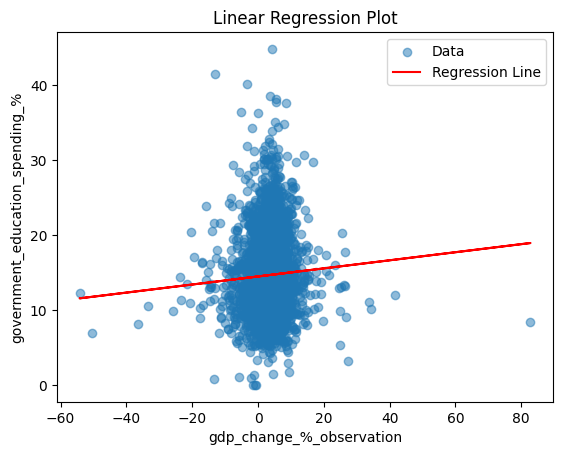

In [15]:
missing_values = merged_df.isnull().sum()
df_clean = merged_df.dropna()

X = df_clean['gdp_change_%_observation']
y = df_clean['government_education_spending_%']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(X['gdp_change_%_observation'], y, alpha=0.5, label='Data')
plt.plot(X['gdp_change_%_observation'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('gdp_change_%_observation')
plt.ylabel('government_education_spending_%')
plt.title('Linear Regression Plot')

plt.legend()
plt.show()

Overall, the results suggest that there is a statistically significant but weak positive relationship between GDP change and government education spending. However, the small R-squared value indicates that the model does not explain much of the variation in government education spending, and other factors may be at play.

                                   OLS Regression Results                                  
Dep. Variable:     government_education_spending_%   R-squared:                       0.008
Model:                                         OLS   Adj. R-squared:                  0.007
Method:                              Least Squares   F-statistic:                     27.29
Date:                             Wed, 06 Mar 2024   Prob (F-statistic):           1.86e-07
Time:                                     16:41:09   Log-Likelihood:                -10651.
No. Observations:                             3586   AIC:                         2.131e+04
Df Residuals:                                 3584   BIC:                         2.132e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                               coef    std err          t      P>|t|      [0.025

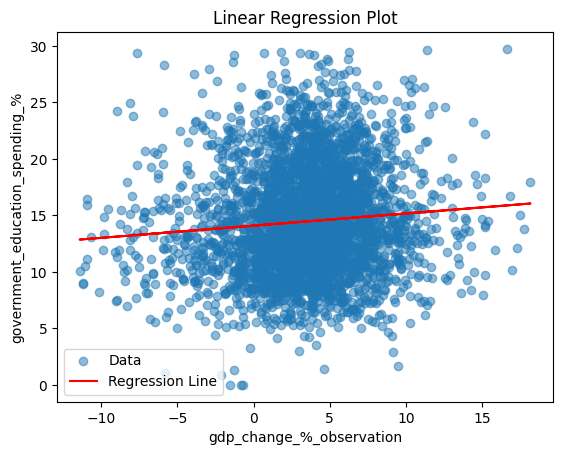

In [16]:
df_clean = merged_df.dropna()
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna()

z_scores_gdp = stats.zscore(df_clean['gdp_change_%_observation'])
z_scores_lit = stats.zscore(df_clean['government_education_spending_%'])
threshold = 3

merged_df_no_extreme = df_clean[(abs(z_scores_gdp) < threshold) & (abs(z_scores_lit) < threshold)]

X = merged_df_no_extreme['gdp_change_%_observation']
y = merged_df_no_extreme['government_education_spending_%']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.scatter(X['gdp_change_%_observation'], y, alpha=0.5, label='Data')
plt.plot(X['gdp_change_%_observation'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('gdp_change_%_observation')
plt.ylabel('government_education_spending_%')
plt.title('Linear Regression Plot')

plt.legend()
plt.show()

In [17]:
correlation = merged_df_no_extreme['gdp_change_%_observation'].corr(merged_df_no_extreme['government_education_spending_%'])
print(correlation)

0.08692306697437635


In [8]:
merged_df.describe()

,year,gdp_change_%_observation,government_education_spending_%
count,3687.000000,3679.000000,3687.000000
mean,2007.989694,3.340775,14.624848
std,9.373767,4.979220,5.089874
min,1980.000000,-54.236000,0.000000
25%,2002.000000,1.409000,11.022486
50%,2010.000000,3.525000,13.930170
75%,2016.000000,5.675500,17.651437
max,2021.000000,82.809000,44.801800
